##Analysis of dataset Give Me Some Credit

---
#Dataset
Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.

Data description:


1. **SeriousDlqin2yrs**: **Target variable**, Person experienced 90 days past due delinquency or worse 
2. RevolvingUtilizationOfUnsecuredLines: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
3. age: Age of borrower in years
4. NumberOfTime30-59DaysPastDueNotWorse: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
5. DebtRatio: Monthly debt payments, alimony,living costs divided by monthy gross income
6. MonthlyIncome: Monthly income
7. NumberOfOpenCreditLinesAndLoans: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
8. NumberOfTimes90DaysLate: Number of times borrower has been 90 days or more past due.
9. NumberRealEstateLoansOrLines: Number of mortgage and real estate loans including home equity lines of credit
10. NumberOfTime60-89DaysPastDueNotWorse: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
11. NumberOfDependents: Number of dependents in family excluding themselves (spouse, children etc.)


#Steps
1.   Preliminaries
  *   Imposrt all the necessary packages
  *   Imports the data using 

2.   Check data
  *   Check Null values
  *   Check outliers
  *   Check unusual data

3.   Preprocess data

  *   Remove or replace any Null values
  *   remove unusual data

4.   Comparing models with differnet variables using AUC
5.   Answering the questions


#Preliminaries

In [53]:
#Imposrt all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from collections import OrderedDict
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import make_scorer, mean_squared_error,roc_curve, auc, roc_auc_score
from sklearn.base import BaseEstimator, TransformerMixin



%matplotlib inline

%matplotlib inline
plt.style.use('ggplot')

In [54]:
#Imports the data
train = pd.read_csv('cs-training.csv', index_col=0)
test = pd.read_csv('cs-test.csv', index_col=0)
train

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


#   Check data



* ###   Check for any Null value



In [55]:
#print out the dimension and the number of null values of both set of data
print("Shape of training set: ",train.shape)
print("Number of Null Values in training data\n ")
print(train.isna().sum(), "\n")
#print out the dimension and the number of null values
print("Shape of testing set: ",test.shape )
print("Number of Null Values in testing data\n ")
test.isna().sum()

Shape of training set:  (150000, 11)
Number of Null Values in training data
 
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64 

Shape of testing set:  (101503, 11)
Number of Null Values in testing data
 


SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In the training data set, there are 29731 values are null in MonthlyIncome and 3924 values are null in NumberOfDependents. \\
In the testing data set, there are 20103 values are null in MonthlyIncome and 2626 values are null in NumberOfDependents.



In [56]:
print('Null values in Train data set in percentage')
print(train[['MonthlyIncome','NumberOfDependents']].isna().sum()/train.shape[0]*100,"\n")

print('Null values in Test data set in percentage')
print(test[['MonthlyIncome','NumberOfDependents']].isna().sum()/train.shape[0]*100)


Null values in Train data set in percentage
MonthlyIncome         19.820667
NumberOfDependents     2.616000
dtype: float64 

Null values in Test data set in percentage
MonthlyIncome         13.402000
NumberOfDependents     1.750667
dtype: float64


Since it is not a small percentage of Null, the data with Null value could not be deleted or ignored directly. Therefore, we need to find a way to fill the Null values.






* ###   Check for any Outliers

In [57]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [58]:
#define a function to check and remove outliers
def remove_outlier(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 
    lower  = q1-1.5*iqr
    higher = q3+1.5*iqr
    df_out = df.loc[(df[col_name] > lower) & (df[col_name] < higher)]
    return df_out

In [59]:
print('RevolvingUtilizationOfUnsecuredLines',remove_outlier(train, 'RevolvingUtilizationOfUnsecuredLines').shape)
print('NumberOfTime30-59DaysPastDueNotWorse',remove_outlier(train, 'NumberOfTime30-59DaysPastDueNotWorse').shape)
print('DebtRatio',remove_outlier(train, 'DebtRatio').shape)
print('NumberOfTimes90DaysLate',remove_outlier(train, 'NumberOfTimes90DaysLate').shape)
print('NumberOfTime60-89DaysPastDueNotWorse',remove_outlier(train, 'NumberOfTime60-89DaysPastDueNotWorse').shape)

RevolvingUtilizationOfUnsecuredLines (149237, 11)
NumberOfTime30-59DaysPastDueNotWorse (0, 11)
DebtRatio (118689, 11)
NumberOfTimes90DaysLate (0, 11)
NumberOfTime60-89DaysPastDueNotWorse (0, 11)


By checking the descriptive statistics, all the numbers in NumberOfOpenCreditLinesAndLoans, NumberRealEstateLoansOrLines and NumberOfDependents seems reasonable and they do not effect the result as much as other values. Therefore, ignore them for now. \

Since there is some notiable facts on outlier removing if we use IQR check. Therefore, we cannot remove the extreme values direclty. More analysis is needed to check unusual data. 

*   The minimum of age is 0, which does make sense considering the fact that people under 18 could not get any credit loan.
*   Outliers removed by checking RevolvingUtilizationOfUnsecuredLines is more than 500, which more data than expected. Analysis is needed to avoid useful data loss. 
*   NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse are the data set that may remove all data as outliers, which need analysis together. 
*   Outliers removed by checking DebtRatio is more than 30,000, which is a lot of data. Analysis is needed to avoid useful data loss. 



* ###   Check unusual data
#### Check age variable

In [60]:
train[train['age'] < 18]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


Since there is only 1 record, we may remove the data.

#### Check Revolving Utilization Of UnsecuredLines

In [61]:
print('\n99.5% quantile',train['RevolvingUtilizationOfUnsecuredLines'].quantile(0.995))
train[train['RevolvingUtilizationOfUnsecuredLines']>2.7].shape


99.5% quantile 1.3662693040650091


(304, 11)

Since 99.5% data are within 1.366, and consider setting the boundry 2.7 and it is not a big portion of total data, we can consider remove them. 

#### Check Number of Days Past Due

In [62]:
train['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

According to calculations, 2-year period is 713 days maximum and could contain maximum 13 times of '30-59 days'. Therefore, the values over 13 is unusual. 

In [63]:
train[train['NumberOfTime30-59DaysPastDueNotWorse']>13].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,269.000000,2.690000e+02,269.000000,269.000000,269.000000,148.000000,269.000000,269.000000,269.0,269.000000,238.000000
mean,0.546468,9.999999e-01,34.245353,97.962825,5.739667,2557.135135,0.007435,97.962825,0.0,97.962825,0.369748
std,0.498764,1.112292e-16,13.061823,0.270628,26.019024,2745.777653,0.086065,0.270628,0.0,0.270628,0.830490
min,0.000000,9.999999e-01,21.000000,96.000000,0.000000,0.000000,0.000000,96.000000,0.0,96.000000,0.000000
25%,0.000000,9.999999e-01,24.000000,98.000000,0.000000,1333.000000,0.000000,98.000000,0.0,98.000000,0.000000
50%,1.000000,9.999999e-01,29.000000,98.000000,0.000000,2168.500000,0.000000,98.000000,0.0,98.000000,0.000000
75%,1.000000,9.999999e-01,43.000000,98.000000,0.000000,3174.500000,0.000000,98.000000,0.0,98.000000,0.000000
max,1.000000,9.999999e-01,79.000000,98.000000,255.000000,28733.000000,1.000000,98.000000,0.0,98.000000,5.000000


From this unusal data, we can conclude that these data are mainly from the yougn peoplev or with lower monthly salary. And they have NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse extreme as well. Therefore, consider removing them all.

In [64]:
train['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [65]:
train['NumberOfTimes90DaysLate'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

Checking other two vairables counting the times of pass due in different period, the number over 17 is unusual and extreme that might effect the fitness of the model so that they can be ignore for later analysis.

In [66]:
print(train['DebtRatio'].describe())
print('\n98% quantile',train['DebtRatio'].quantile(0.98))
train[train['DebtRatio']>3839].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

98% quantile 3839.0


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,156.000000,2999.000000,2999.000000,2999.000000,2999.000000,2831.000000
mean,0.067022,13.093813,53.925975,0.319773,6483.297099,0.070513,11.876292,0.049350,2.437479,0.052351,0.571529
std,0.250102,320.202416,10.478536,0.824155,12151.819379,0.256834,5.474213,0.342992,1.586091,0.284572,1.039038
min,0.000000,0.000000,25.000000,0.000000,3840.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.052591,46.000000,0.000000,4293.000000,0.000000,8.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,0.248998,54.000000,0.000000,4983.000000,0.000000,11.000000,0.000000,2.000000,0.000000,0.000000
75%,0.000000,0.598376,62.000000,0.000000,6187.000000,0.000000,15.000000,0.000000,3.000000,0.000000,1.000000
max,1.000000,13930.000000,94.000000,10.000000,329664.000000,1.000000,43.000000,7.000000,23.000000,4.000000,6.000000


With checking the [information](https://rates.ca/resources/my-debt-to-income-ratio-is-higher-than-153-but-thats-okay), 75% data obtains a debt ratio is less than 190% and there are quite a few debt ratio data is more than 200%. Additionally, only 2% of the data has debt ratio over 3839. By analyse the descriptive statistics, it is easy to find that people tends to have no income or almost none with high debt ratio. Therefore, we consider removing it. 

#Preprocess Data
* ### Fill the Null values
First we check the distribution of the variables that we need to deal with

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


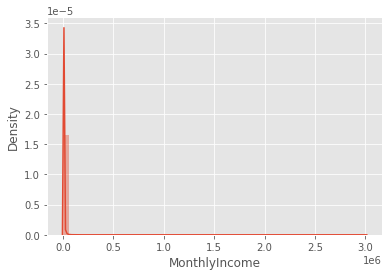

In [67]:
#first, we check the distribution of MonthlyIncome
print(train['MonthlyIncome'].describe())
sns.distplot(train['MonthlyIncome'].dropna())

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64


(0.0, 20.0)

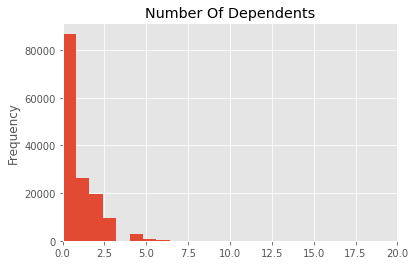

In [68]:
#then we check the distribution of NumberOfDependents
print(train['NumberOfDependents'].describe())
plt.hist(train['NumberOfDependents'], bins=25)
plt.gca().set(title='Number Of Dependents', ylabel='Frequency'); 
plt.xlim(0,20)

Comparing two variables, the variable NumberOfDependents is simpler to deal with. Acoording to the statistical description and the histogram, we can replace the Null value using mode 0. \

From the first histogram, we can find that the value of Monthly Income is right skewed. 
And the values are mostly between 0 and 10,000 according to the description data, as 75 percentile is 8.249000e+03. Therefore we can use random forest regression to fill the Null values.

In [69]:
#replace the null in NumberOfDependents by 0
train['NumberOfDependents'].fillna(0,inplace=True)
test['NumberOfDependents'].fillna(0,inplace=True)

In [70]:
#use random forest to predict the Null values
trainWithMI = train[pd.isnull(train['MonthlyIncome']) == False]
withMI_x = trainWithMI.drop(columns=['SeriousDlqin2yrs','MonthlyIncome'])
trainWithoutMI = train[pd.isnull(train['MonthlyIncome'])]
withoutMI_x = trainWithoutMI.drop(columns=['SeriousDlqin2yrs','MonthlyIncome'])

In [71]:
forest_model = RandomForestRegressor(n_estimators=350, 
                                      max_depth=3,
                                      max_features='auto', 
                                      bootstrap=True,
                                      random_state=20221110,
                                      n_jobs=-1, 
                                      verbose=0
                                      )
forest_model.fit(withMI_x, trainWithMI['MonthlyIncome'])

RandomForestRegressor(max_depth=3, n_estimators=350, n_jobs=-1,
                      random_state=20221110)

In [72]:
predMonthlyIncome = forest_model.predict(withoutMI_x).round(0)
trainWithoutMI['MonthlyIncome'] = predMonthlyIncome
train = trainWithMI.append(trainWithoutMI)
train.reset_index(inplace=True)
train.drop('index',inplace=True,axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
#using the same model to predict the Monthly Income in test data set
testWithMI = test[pd.isnull(test['MonthlyIncome']) == False]
withMI_x = testWithMI.drop(columns=['SeriousDlqin2yrs','MonthlyIncome'])
testWithoutMI = test[pd.isnull(test['MonthlyIncome'])]
withoutMI_x = testWithoutMI.drop(columns=['SeriousDlqin2yrs','MonthlyIncome'])
forest_model.fit(withMI_x, testWithMI['MonthlyIncome'])

RandomForestRegressor(max_depth=3, n_estimators=350, n_jobs=-1,
                      random_state=20221110)

In [74]:
predMonthlyIncome = forest_model.predict(withoutMI_x).round(0)
testWithoutMI['MonthlyIncome'] = predMonthlyIncome
test = testWithMI.append(testWithoutMI)
test.reset_index(inplace=True)
test.drop('index',inplace=True,axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         101503 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    101503 non-null  float64
dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


* ###   Process the outliers or unusual values 
  1.   Remove the value with age under 18
  2.   Remove the value with RevolvingUtilizationOfUnsecuredLines more than 2.7 
  3.   Remove the value with NumberOfTime30-59DaysPastDueNotWorse NumberOfTime60-89DaysPastDueNotWorse equals or greater than 17 or 20. 
  4.   Remove the value with DebtRatio is more than 3839.




In [75]:
#remove the unusual data from training data
train = train[train['age']>18]
train = train[train['RevolvingUtilizationOfUnsecuredLines']<=2.7]
train = train[train['NumberOfTime30-59DaysPastDueNotWorse']<=13]
train = train[train['NumberOfTime60-89DaysPastDueNotWorse']<=17]
train = train[train['DebtRatio']<3839]
train.shape

(146436, 11)

* ### check the target value and Monthly Income after null filling

percentage of serious deliquency 6.587178016334781 %


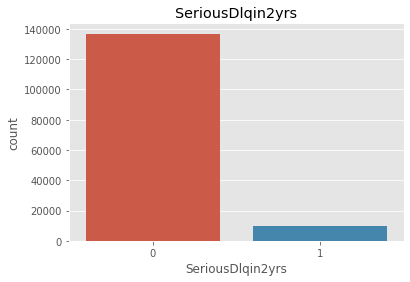

In [76]:
sns.countplot(x='SeriousDlqin2yrs', data = train)
plt.title("SeriousDlqin2yrs")

print('percentage of serious deliquency',sum(train.SeriousDlqin2yrs==1)/train.shape[0]*100,"%")

The number of people experienced 90 days past due delinquency or worse takes only 6.59% of total. 


Text(0.5, 0, 'Monthly Income')

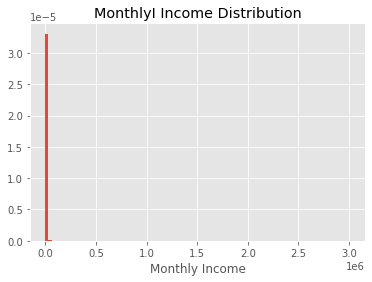

In [77]:
train.MonthlyIncome.hist(bins=100, density=True)
plt.title("MonthlyI Income Distribution")
plt.xlabel("Monthly Income")

By construct the histogram of the monthly income for all the customers, we notice that the distribution is right-skewed and has a heavy tail. Therefore it is adequate to transform it by applying the logarithm function. \
Since there is value equals 0 in MonthlyIncome, we use log(n+1) to avoid infinite result.

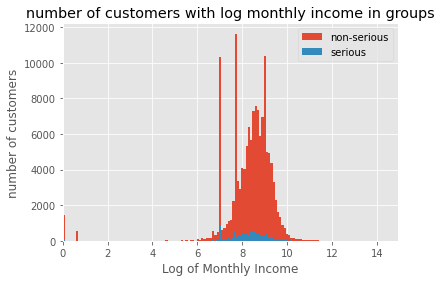

In [78]:
train['Log_MonthlyIncome'] = np.log(train['MonthlyIncome']+1)
train.Log_MonthlyIncome.groupby(train['SeriousDlqin2yrs']).plot.hist(bins=150, title='number of customers with log monthly income in groups')
plt.xlabel('Log of Monthly Income')
plt.ylabel('number of customers')
plt.xlim([min(train.Log_MonthlyIncome),max(train.Log_MonthlyIncome)])
plt.legend(['non-serious','serious'])
plt.show()

Notice that log of monthly income has a more normal distribution, we will use log of monthly income instead of MonthlyIncome in the further analysis.
# Model
* ###   Find the most relevent variables

  Since we are checking the probabilities as response value, we first build a logistic regression model

In [79]:
model1 = Pipeline([
    ('logistic_regression', LogisticRegression(solver='lbfgs', max_iter=10000, random_state=20221112))
])

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Now estimate and compare using cross validation the performance of all the simple models.

Text(0.5, 1.0, 'Cross Validation ')

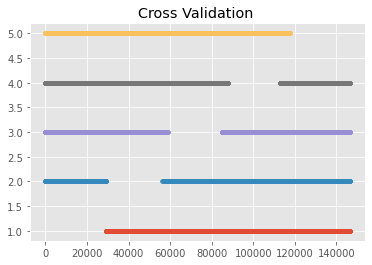

In [80]:
#use cross validation to find the expected test error of the models
X = train[['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Log_MonthlyIncome']]
y = train['SeriousDlqin2yrs']
str_kf = StratifiedKFold(n_splits=5)
for j, (index_train, index_test) in enumerate(str_kf.split(X,y)):
    # enumerate has the index and the elements in the folds
    #print(k, (index_train, index_test))
    plt.plot(index_train, [j+1 for s in index_train], '.')
plt.title('Cross Validation ')

In [81]:
# Define a function AUC_calculation which calculates the AUC of the model1 trained on index_train and tested on index_test.
def AUC_calculation(X, y, index_train, index_test):
    # Define Xtrain, ytrain, Xtest, ytest 
    Xtrain, ytrain = X[X.index.isin(index_train)] , y[y.index.isin(index_train)]
    Xtest, ytest = X[X.index.isin(index_test)] , y[y.index.isin(index_test)]
    Xtest.head()
    #fit the model and predict the default probabilities
    model = model1.fit(Xtrain,ytrain.values)
    ypre = model.predict_proba(Xtest)[:,1]
    
    # Calculate the auc score
    auc = roc_auc_score(ytest,ypre)
    return auc 

In [82]:
# Using AUC_calculation create a function named AUC_cross_validation which does a n_fold cross validation (using StratifiedKFold). The function output list with the AUC for each fold.
def AUC_cross_validation(X, y, n_fold):
    # Create the stratified folds
    str_kf = StratifiedKFold(n_splits=n_fold)
    # list with the auc scores
    list_auc = []
    # hint: take as guide the code in which you remembered cross-validation technique
    for j,  (index_train, index_test) in enumerate(str_kf.split(X,y)):
        list_auc.append(AUC_calculation(X, y, index_train, index_test))
    
    return list_auc

In [83]:
#Checking the AUC scores with each single varibale
n_fold = 10
AUC_models = pd.DataFrame()
for col_name in X.columns:
    AUC_models['simple-'+col_name] = AUC_cross_validation(X[[col_name]], y, n_fold)

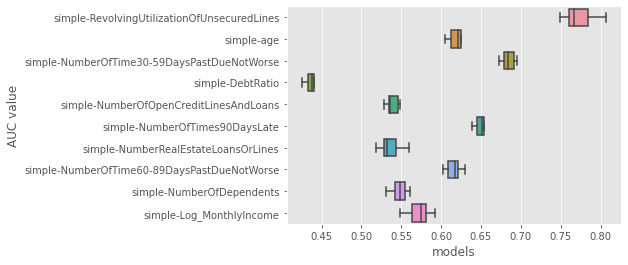

In [84]:
#plot the AUC result in boxplot 
sns.set_palette('Set2')
sns.boxplot(x="value", y="variable", data=pd.melt(AUC_models),showfliers=False)
plt.xlabel('models')
plt.ylabel('AUC value')
plt.show()

In [85]:
AUC_models["All_variables"] = AUC_cross_validation(X, y, n_fold)

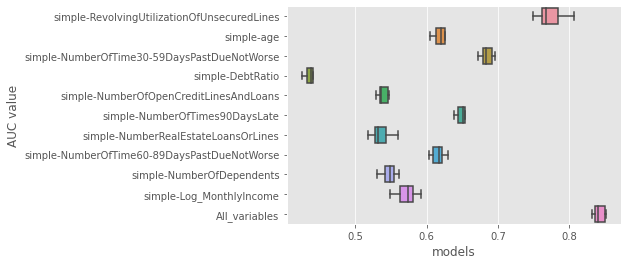

In [86]:
sns.boxplot(x="value", y="variable", data=pd.melt(AUC_models),showfliers=False)
plt.xlabel('models')
plt.ylabel('AUC value')
plt.show()

In [87]:
AUC_models.mean(axis=0).sort_values()

simple-DebtRatio                               0.450491
simple-NumberRealEstateLoansOrLines            0.538927
simple-NumberOfDependents                      0.544983
simple-NumberOfOpenCreditLinesAndLoans         0.545589
simple-Log_MonthlyIncome                       0.572515
simple-NumberOfTime60-89DaysPastDueNotWorse    0.616114
simple-age                                     0.632368
simple-NumberOfTimes90DaysLate                 0.654225
simple-NumberOfTime30-59DaysPastDueNotWorse    0.684134
simple-RevolvingUtilizationOfUnsecuredLines    0.776114
All_variables                                  0.849472
dtype: float64

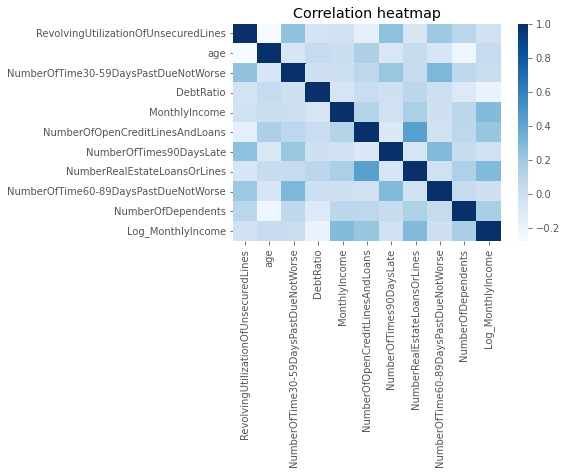

In [88]:
#Chekc the correlations among the variables
corrAll = train.drop(columns='SeriousDlqin2yrs').corr()
plt.title("Correlation heatmap")
sns.heatmap(corrAll, cmap="Blues");

* ### Compare models with different variables

In [89]:
#Try dropping the debt ratio see if it effects the model
AUC_models["without_debtratio"] = AUC_cross_validation(X.drop(columns='DebtRatio'), y, n_fold)
#get the mean of the vraibles 
train['meanOfNum'] = train.loc[:, ["NumberOfTime60-89DaysPastDueNotWorse","NumberOfTime30-59DaysPastDueNotWorse","NumberOfTimes90DaysLate"]].mean(axis = 1)
X2 = train[['RevolvingUtilizationOfUnsecuredLines', 'age','DebtRatio',
       'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 
       'NumberOfDependents', 'Log_MonthlyIncome','meanOfNum']]

In [90]:
AUC_models["with_mean"] = AUC_cross_validation(X2, y, n_fold)
AUC_models["with_mean_outDR"] = AUC_cross_validation(X2.drop(columns='DebtRatio'), y, n_fold)

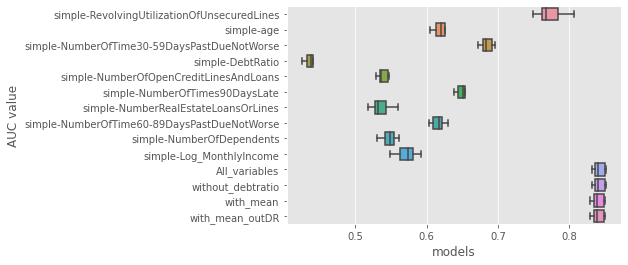

In [91]:
sns.boxplot(x="value", y="variable", data=pd.melt(AUC_models),showfliers=False)
plt.xlabel('models')
plt.ylabel('AUC value')
plt.show()

In [92]:
AUC_models.mean(axis=0).sort_values()

simple-DebtRatio                               0.450491
simple-NumberRealEstateLoansOrLines            0.538927
simple-NumberOfDependents                      0.544983
simple-NumberOfOpenCreditLinesAndLoans         0.545589
simple-Log_MonthlyIncome                       0.572515
simple-NumberOfTime60-89DaysPastDueNotWorse    0.616114
simple-age                                     0.632368
simple-NumberOfTimes90DaysLate                 0.654225
simple-NumberOfTime30-59DaysPastDueNotWorse    0.684134
simple-RevolvingUtilizationOfUnsecuredLines    0.776114
with_mean_outDR                                0.847609
with_mean                                      0.848102
without_debtratio                              0.848832
All_variables                                  0.849472
dtype: float64

Therefore, from the boxplot, we could decide to choose the model with meanOfNum and DebtRatio. 

* ### Fit the model with training data
  As we have chosen the model, we can fit the model with training data

In [93]:
# split the model in 7:3
Xtrain, Xtest, ytrain, ytest = train_test_split(X2,y,test_size=0.3,random_state=20221112)
model1.fit(Xtrain, ytrain)
ytest_pred=model1.predict_proba(Xtest)[:,1]

# Create the ROC curve and report AUC
auc_model = roc_auc_score(ytest, ytest_pred) 
print(f'The AUC of the model is: {auc_model}')

The AUC of the model is: 0.8487295150608429


Then we use boostrap to check the confidence interval of the AUC value

In [94]:
boostraps_num = 1200
boostraps_auc =[]
n = len(ytest)


np.random.RandomState(0)
for i in range(boostraps_num):
    index = np.random.randint(0, n, n)
    score = roc_auc_score(ytest.values[index],ytest_pred[index]) 
    boostraps_auc.append(score)

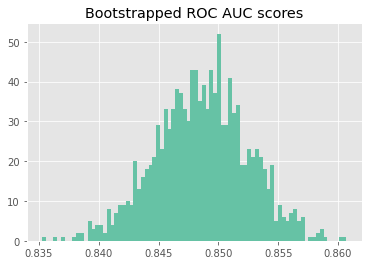

In [95]:
plt.hist(boostraps_auc, bins=80)
plt.title('Bootstrapped ROC AUC scores')
plt.show()

In [96]:
org_boots_auc= np.array(boostraps_auc)
org_boots_auc.sort()

# Calculating the limits, this is the 0.025 and 0.975 percentiles of the Boostrap distribution 
ci_min = round(org_boots_auc[int(0.025*boostraps_num)],2)
ci_max = round(org_boots_auc[int(0.975*boostraps_num)],2)

# 
print(f'The CI for the AUC of the model is: {(ci_min,ci_max) }')

The CI for the AUC of the model is: (0.84, 0.86)


Since the result calculated before, 0.8487 is within the confidence interval using boostrap. It can be conclude that this is a good model, using logistic regression, so far to fit the model. 

#Questions

##Part 1

1.   What are the factors that have high correlation with the probability of loan default? \
  According to the AUC scores using cross validation, the top 3 correlated variables are RevolvingUtilizationOfUnsecuredLines, NumberOfTime30-59DaysPastDueNotWorse and NumberOfTimes90DaysLate, disregarding the model with all variables. 
2.   Are there intereaction effects occurring among the variables? \
  According to the heatmap of the variabales. For example, the NumberOfTime30-59DaysPastDueNotWorse has strong correlation among NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse. Considering they are all the variables counting Number of past due tiems borrower in different time interval.
3.   Any other Prelimiery analysis for the given data? \
  All the preliminary analysis did for the data set contains the checking the null value and abnormal values. In addition, we need to check the distribution of the varaibles and might perform transformations. 

## Part 2

1.   Tell us how you validate your model and why you chose such evaluation technique(s). \
  I used AUC to validate the model. Since by checking the AUC value, we can see the percentage of correct probability and classification. 
2.   What is AUC? Why do you think AUC was used as the evaluation metric for this challenge? What other metrics do you think would also be suitable for this competition? \
  AUC is the area under the ROC curve, representing the measure of separability.
3.   Short explanation of what you tried. What worked and what did not work (ie. you might have tried different features/models before the final one). \
  First, I tried to use pairplots to check the correlations among the variables. However, it takes a long time, more than 7 mins, to run. Therefore, I searched for an alternative way using heatmap. \
  The first model I tried is fitting all variables. However, during the checking the correlations of the variables and the AUC scores of single varibales, a few notiable thing is pointed out. Since the thre variables counting the number of overdues are correlated, I considered to get a mean of three values. Additionally, debt ratio seems a bit unrelated so check the models with and without this variables. The result 
4.   What insight(s) do you have from your model(s)? \


5.   Can you get into the top 100 of the private leaderboard or even higher? \

